### Tensorflow (ft.keras)

- keyword: tensolflow, keras, numpy, sequantial, funcional,  model, flatten, dense, conv2D, maxfool, relu, activation, softmax, dropout, compile, optimizer, loss, metrics, adam, fit, epochs, accuracy, evaluate, verbose, overfitting, 

TensorFlow is a free and open-source software library for machine learning and artificial intelligence. It can be used across a range of tasks but has a particular focus on training and inference of deep neural networks.

When to use a Sequential model
A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

## EXPLORATION_01

### Tensorflow_keras를 이용해서 가위바위보 판독기 만들기


#### standard
1. 이미지 분류기 모델이 성공적으로 만들어지고 트레이닝이 정상적으로 수행되었는가? 모델 잘 만들고 트레이닝 시켰는지
2. 오버피팅을 극복하기 위한  데이터셋의 다양성, 정규화 등의 시도가 적절하였는가? 데이터셋를 잘 만들었는지
3. 분류모델의 test accuracy가 60% 이상 도달하였는가? accuracy

    
#### sequence
1. 데이터 준비: 필요한 Library import -> 데이터 Resizing(shape) -> 데이터 labeling 및 행렬 생성 -> 데이터 정규화
2. 인공지능 모델 구현:tensorflow와 keras로 구축 
3. 인공지능 모델 학습
4. 모델 평가: Validation set으로 모델 성능 검증 -> Test set으로 모델 성능 평가

    
#### trial and error

In [8]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

import os
from PIL import Image
import glob

#### 데이터 Resizing

In [14]:
from PIL import Image
import os, glob
import numpy as np

def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(112,112)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/EXPLORATIONS/EX_01/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

200  images to be resized.
200  images resized.
가위 이미지 resize 완료!


In [15]:
from PIL import Image
import os, glob
import numpy as np

def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(112,112)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/EXPLORATIONS/EX_01/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

200  images to be resized.
200  images resized.
바위 이미지 resize 완료!


In [16]:
from PIL import Image
import os, glob
import numpy as np

def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(112,112)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/EXPLORATIONS/EX_01/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

200  images to be resized.
200  images resized.
보 이미지 resize 완료!


#### 데이터 labeling 및 행렬 생성

In [17]:
import numpy as np

def load_data(img_path, number_of_data=600):  # 가위바위보 이미지 개수 총합에 주의
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=112
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

#### 데이터 정규화

In [18]:
image_dir_path = os.getenv("HOME") + "//aiffel/EXPLORATIONS/EX_01/"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 600 입니다.
x_train shape: (600, 112, 112, 3)
y_train shape: (600,)


라벨:  0


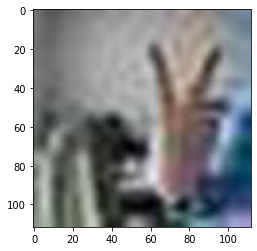

In [19]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

#### 모델을 만들어봅시다

In [22]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential() #먼저 Sequential API를 사용해 네트워크를 model변수에 초기화 한다.
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(112,112,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(125, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

# Conv2D 레이어에 이미지 특징 수, 입력 이미지의 형태 등을 넣고 MaxPooling2D를 통해 맥스 풀링 연산을 한다.
# Dense 레이어는 분류기에 사용되는 뉴런의 숫자를 입력하고 마지막 Dense 레이어에는 결과에 도출할 클래스 수를 입력한다.
# 우리는 가위, 바위, 보 세가지 클래스 이므로, 정수 3을 입력한다.

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 110, 110, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 55, 55, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 53, 53, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 26, 26, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 125)               2704125   
_________________________________________________________________
dense_5 (Dense)              (

#### 학습을 시켜봅시다 

In [23]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
19/19 [==============================] - 1s 19ms/step - loss: 136.4387 - accuracy: 0.4483
Epoch 2/10
19/19 [==============================] - 0s 7ms/step - loss: 2.6251 - accuracy: 0.7650
Epoch 3/10
19/19 [==============================] - 0s 7ms/step - loss: 0.3100 - accuracy: 0.8850
Epoch 4/10
19/19 [==============================] - 0s 7ms/step - loss: 0.0751 - accuracy: 0.9750
Epoch 5/10
19/19 [==============================] - 0s 7ms/step - loss: 0.0389 - accuracy: 0.9933
Epoch 6/10
19/19 [==============================] - 0s 7ms/step - loss: 0.0204 - accuracy: 0.9983
Epoch 7/10
19/19 [==============================] - 0s 7ms/step - loss: 0.0109 - accuracy: 1.0000
Epoch 8/10
19/19 [==============================] - 0s 7ms/step - loss: 0.0089 - accuracy: 1.0000
Epoch 9/10
19/19 [==============================] - 0s 7ms/step - loss: 0.0065 - accuracy: 1.0000
Epoch 10/10
19/19 [==============================] - 0s 7ms/step - loss: 0.0044 - accuracy: 1.0000


#### test

In [24]:
test_path = os.getenv("HOME") + "/aiffel/EXPLORATIONS/EX_01/test2"
resize_images(test_path + "/rock")
resize_images(test_path + "/scissor")
resize_images(test_path + "/paper")

print("가위 이미지 resize 완료!")
(x_test, y_test)=load_data(test_path,300)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 112, 112, 3)
y_test shape: (300,)


In [25]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 18.4787 - accuracy: 0.4400
test_loss: 18.478744506835938 
test_accuracy: 0.4399999976158142



####  standard
1. 이미지 분류기 모델이 성공적으로 만들어지고 트레이닝이 정상적으로 수행되었는가? 모델 잘 만들고 트레이닝 시켰는지 yes
2. 오버피팅을 극복하기 위한  데이터셋의 다양성, 정규화 등의 시도가 적절하였는가? 데이터셋를 잘 만들었는지 yes
3. 분류모델의 test accuracy가 60% 이상 도달하였는가?


#### trial and error

- 학습데이터 변경: 처음엔_내가 찍은 사진 각100장 총 300장으로 학습 진행/두번째_세사람이 각각 찍은 사진 100장 총300장으로 학습시킴/세번째_네사람이 찍은 사진 200장 총 600장으로 학습시킴 && 학습이미지 해상도 변경 && parameter 변경
- Hyper parameter값 변경

아쉬운점)
제출 직전에 보니 파일이 날라가있었다... 그래서 다시 급하게 만들어 봤는데,
1. 학습데이터를 더이상 높이지 않고 accuracy높히는 방법을 찾아볼 것
2. parameter값만 변경해서 높혀볼 것


두 기준으로 작업한 결과 0.2x 에서 0.4x 까지 test_accuracy가 높아짐
그럼에도 기준치인 60%에 도달하진 않았지만 처음 공부해보면서 tensorflow에 대해 전반적으로 익힐 수 있는 시간이었다. 